<a href="https://colab.research.google.com/github/BahodirML/AI_Projects/blob/main/Segmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import torch
import fastai
import numpy as np


torch.cuda.is_available()

True

In [2]:
from fastai.vision.all import *
path = untar_data(URLs.CAMVID_TINY)

path.ls()

(#3) [Path('/root/.fastai/data/camvid_tiny/images'),Path('/root/.fastai/data/camvid_tiny/codes.txt'),Path('/root/.fastai/data/camvid_tiny/labels')]

In [6]:
#label getter function

def label_getter(file): return path/'labels'/f'{file.stem}_P{file.suffix}'

#dataloaders
dls = SegmentationDataLoaders.from_label_func(path,bs=8,fnames = get_image_files(path/'images'),
                                              label_func = label_getter,
                                              codes = np.loadtxt(path/'codes.txt', dtype = str))
#fine_tuning
learn = unet_learner(dls, resnet34)
learn.fine_tune(12)

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet34_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet34_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet34-b627a593.pth" to /root/.cache/torch/hub/checkpoints/resnet34-b627a593.pth
100%|██████████| 83.3M/83.3M [00:01<00:00, 73.4MB/s]


epoch,train_loss,valid_loss,time
0,2.905106,2.460128,00:09


epoch,train_loss,valid_loss,time
0,1.866796,1.705708,00:01
1,1.618822,1.365919,00:01
2,1.463522,1.233641,00:01
3,1.355391,1.128654,00:01
4,1.223419,1.104382,00:01
5,1.121759,0.915610,00:01
6,1.021085,0.853296,00:01
7,0.934281,0.839643,00:01
8,0.857514,0.770349,00:01
9,0.791481,0.768732,00:01


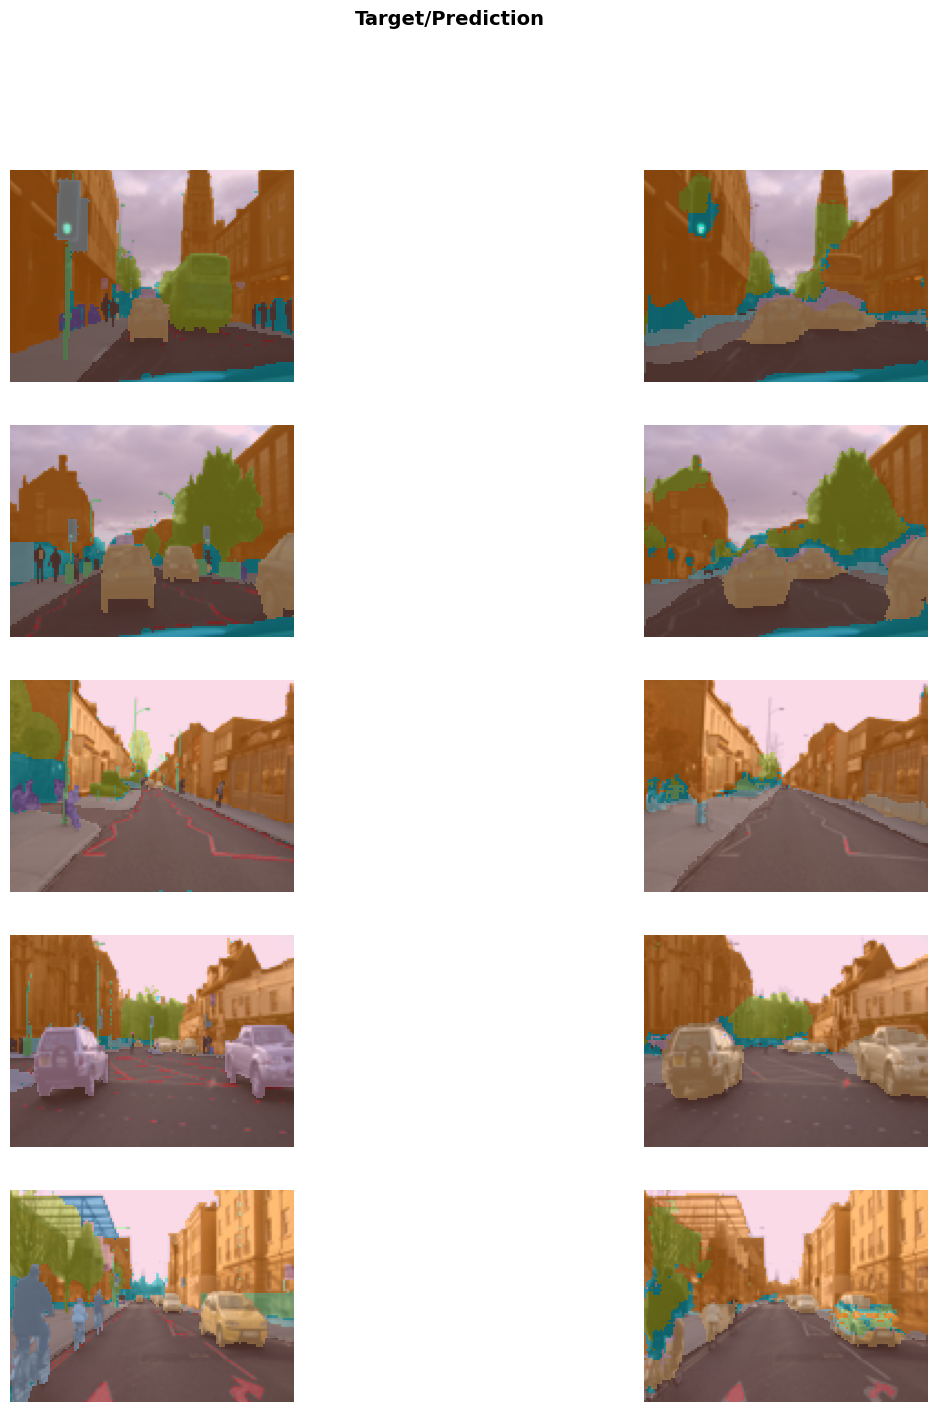

In [7]:
learn.show_results(max_n = 5, figsize = (15,16))